In [1]:
import numpy as np
from scipy import *
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xppcall import xpprun
import networkx as nx
import conley_functions as cf
import subprocess
import nolds
import scipy.optimize

####Set up network weights
a = 16
b = 12
d = 4
e = -2
W = np.array([[a, 0, -b, 0], [0, a, 0, -b],
              [a, 0, -d, 0], [0, a, 0, -d]]) 
N = W.shape[0]
ps = [-1,-1,-4,-4]

In [112]:
#make file to simulate Wilson-Cowan network with XPP
ksdm=-1
time=500
dt=0.05
P = 1
expn = 21
gamma = 10
Weights = []
datass = []
initss = []

for expi in  np.linspace(-10, 10, num=expn):
    Wp = np.zeros((N,N))
    Wp[0,-1] = ksdm
    Wp[1,-2] = ksdm
    Wp[2,-3] = ksdm
    Wp[3,-4] = ksdm
    Wp[0,1] = expi
    Wp[1,0] = expi
    Wp[2,3] = expi
    Wp[3,2] = expi
    Ws = W + Wp
    
    Weights.append(Ws)
    wcstring = cf.make_wc(Ws, ps, dt=dt, inits=np.random.rand(N))
    with open('wc_p.ode', 'w') as f:
        f.writelines(wcstring)

    datas = np.zeros((P, int(.1/dt)*time*10+1, N))
    data_length_list = []
    for j in range(P):
        inits = np.random.rand(N)
        initss.append(inits)
        inits_dict={}
        for i,init in enumerate(inits[:]):
            inits_dict['x'+str(i+1)]=init
        npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
        datas[j, :, :] = npa[:,1:].copy()
        data_length_list.append(npa[:,1:].shape[0])
    datass.append(datas)

<IPython.core.display.Javascript object>


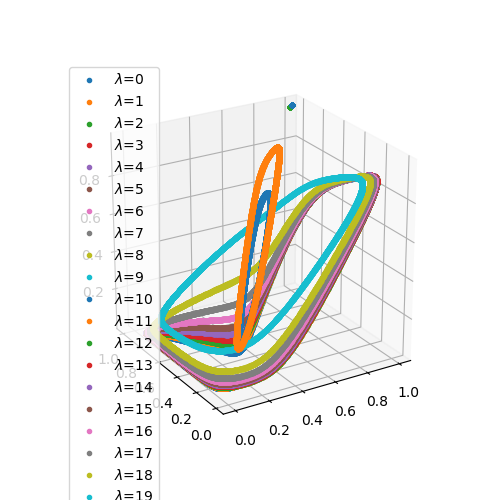

In [113]:
%matplotlib notebook
colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
time=500
shift=int((int(.1/dt)*time*10+1)*.5)
til=int((int(.1/dt)*time*10+1)*.05)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for j in range(0,expn):
    for k in range(P):
#         ax.plot(datass[j][k,shift:til,0], datass[j][k,shift:til,1], datass[j][k,shift:til,2], '.', label=r"$\lambda$="+str(j))#str(j)+':'+str(k))
        ax.plot(datass[j][k,shift:,0], datass[j][k,shift:,1], datass[j][k,shift:,2], '.', label=r"$\lambda$="+str(j))#str(j)+':'+str(k))
        plt.legend()
plt.show()

In [114]:
# %matplotlib notebook
# plt.figure(figsize=(9,3))
# j=18
# # for j in range(31,32, 10):
# #     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
# shift=int(20*time*0.5)
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,1])
# # for i in range(10):
# #     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,i])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,2])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,3])

In [ ]:
Ws=Weights[9]

time=1000
wcstring = cf.make_wc(Ws, ps, dt=0.05)
with open('wc_p.ode', 'w') as f:
    f.writelines(wcstring)
grid=cf.make_grid(4, 0.25, 0.75, 0.25)
# grid=cf.make_grid(4, 0.2, 0.8, 0.2)
# grid=cf.make_grid(4, 0.2, 0.8, 0.1)
# grid=cf.make_grid(4, 0.0, 0.1, 0.25)

# grid=cf.make_grid(4, 0., 1, 1.)
P = len(grid)
print("P:",P,Ws)
datas = np.zeros((P, int(.1/dt)*time*10+1, N))
data_length_list = []
for j,gc in enumerate(grid):
    with open('wc_p.ode', 'w') as f:
        f.writelines(wcstring)
    inits_dict={}
    for i,init in enumerate(gc[:]):
        inits_dict['x'+str(i+1)]=init
    npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
    datas[j, :, :] = npa[:,1:].copy()

P: 81 [[ 16.  -1. -12.  -1.]
 [ -1.  16.  -1. -12.]
 [ 16.  -1.  -4.  -1.]
 [ -1.  16.  -1.  -4.]]


In [ ]:
%matplotlib notebook
# time=100
colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
shift=int((int(.1/dt)*time*10+1)*.4)
til=int((int(.1/dt)*time*10+1)*.9)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
# for k in range(P):
i=3
for k in range(10*i,10*(i+1)):
# for k in range(35,40):
#     print(k,grid[k])
    ax.plot(datas[k,shift:til,0], datas[k,shift:til,1], datas[k,shift:til,2], '.', label=r"$\lambda$="+str(k))#str(j)+':'+str(k))
#     ax.plot(datas[k,shift:,0], datas[k,shift:,1], datas[k,shift:,2], '.', label=r"$\lambda$="+str(k))#str(j)+':'+str(k))
#     plt.legend()
plt.show()

<IPython.core.display.Javascript object>


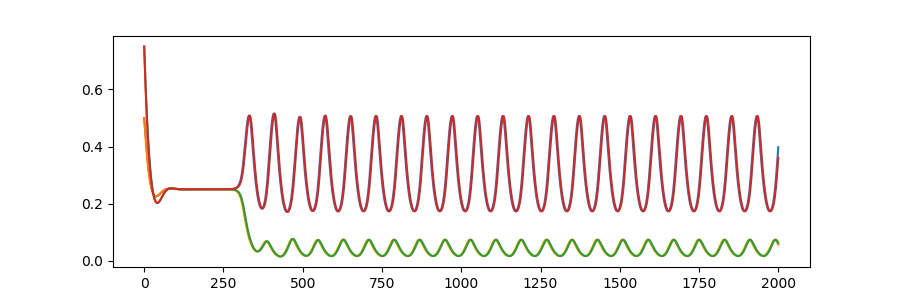

In [253]:
%matplotlib notebook
plt.figure(figsize=(9,3))
j=36
# for j in range(31,32, 10):
#     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
shift=int(20*time*0.)
plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,0])
plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,1])
# plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,2])
# plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,3])
j=76
plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,0])
plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,1])
# plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,2])
# plt.plot(range(datas[j,shift:,0].shape[0]), datas[j,shift:,3])

In [133]:
# ex=10
# Ws[0,1] = ex
# Ws[1,0] = ex
# Ws[2,3] = ex
# Ws[3,2] = ex
# Ws

In [289]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def F(x):
    return -x+sigmoid(Ws.dot(x)+np.array(ps))
x=scipy.optimize.broyden2(F, [.99]*4, f_tol=1e-15)
cf.eval_wcode(x, Weights[0], ps), x, np.linalg.eig(cf.jac(x,Weights[0],ps))[0]
x,np.linalg.eig(Weights[0])[0]

(array([0.37827242, 0.37827242, 0.36866933, 0.36866933]),
 array([16.+9.32737905j, 16.-9.32737905j, -4.+9.74679434j, -4.-9.74679434j]))

In [305]:
time=1000
Ws = Ws
wcstring = cf.make_wc(Ws, ps, dt=0.05)
with open('wc_p.ode', 'w') as f:
    f.writelines(wcstring)
data_length_list = []
sinits = [x+np.array([.0000001,.000000,.000000,0.00000]),
         x+np.array([.000000,.0000001,.000000,0.00000]),
         x+np.array([.000000,.000000,.0000001,0.00000]),
         x+np.array([.000000,.000000,.000000,0.000001]),
         x+np.array([.0000001,.0000001,.000000,0.00000]),
         x+np.array([.0000001,.000000,.0000001,0.00000]),
         x+np.array([.0000001,.000000,.000000,0.000001]),
         x+np.array([.000000,.0000001,.0000001,0.00000]),
         x+np.array([.000000,.000000,.0000001,0.000001]),
         x+np.array([.0000001,.0000001,.0000001,0.00000]),
         x+np.array([.0000001,.0000001,.000000,0.000001]),
         x+np.array([.0000001,.000000,.0000001,0.000001]),
         x+np.array([.0000001,.0000001,.0000001,0.000001])]
datas2 = np.zeros((len(sinits), int(.1/dt)*time*10+1, N))
for j,inits in enumerate(sinits):
    inits_dict={}
    for i,init in enumerate(inits[:]):
        inits_dict['x'+str(i+1)]=init
    npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
    datas2[j, :, :] = npa[:,1:].copy()

<IPython.core.display.Javascript object>


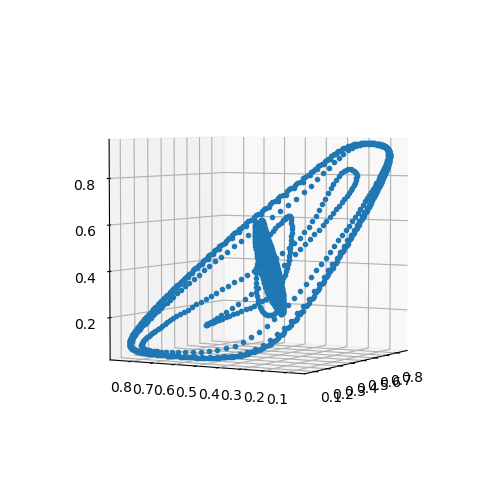

In [329]:
%matplotlib notebook
# time=500
shift=int((int(.1/dt)*time*10+1)*0.1)
til=int((int(.1/dt)*time*10+1)*.9)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
# for k in range(0,len(sinits)):
for k in range(0,1):
#     ax.plot(datas2[k,shift:,0], datas2[k,shift:,1], datas2[k,shift:,2], '.', label=r"$\lambda$="+str(j))
    ax.plot(datas2[k,shift:til,0], datas2[k,shift:til,1], datas2[k,shift:til,2], '.', label=r"$\lambda$="+str(j))
plt.show()

<IPython.core.display.Javascript object>


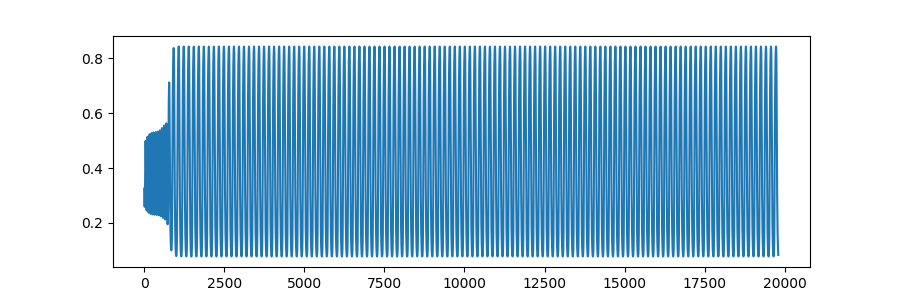

In [324]:
%matplotlib notebook
plt.figure(figsize=(9,3))
j=0
# for j in range(31,32, 10):
#     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
shift=int(20*time*.1)
plt.plot(range(datas2[j,shift:,0].shape[0]), datas2[j,shift:,0])
# plt.plot(range(datas2[j,shift:,0].shape[0]), datas2[j,shift:,1])
# plt.plot(range(datas2[j,shift:,0].shape[0]), datas2[j,shift:,2])
# plt.plot(range(datas[j,shift:,0].shape[0]), datas2[j,shift:,3])
# j=1
# plt.plot(range(datas2[j,shift:,0].shape[0]), datas2[j,shift:,0])
# plt.plot(range(datas2[j,shift:,0].shape[0]), datas2[j,shift:,1])
# plt.plot(range(datas2[j,shift:,0].shape[0]), datas2[j,shift:,2])
# plt.plot(range(datas2[j,shift:,0].shape[0]), datas2[j,shift:,3])

In [45]:
# datass

In [216]:
#Make combinatorial dynamical system from the data
shift=int(time*1.)
# hdatas = np.array(datass).reshape(P*(expn*time*20+1),N)#npa[:shift,1:]
# hdatas = np.array(datass[7]).reshape(-1,N)
hdatas = np.array(npa[:,1:]).reshape(-1,N)
# data_length_list = [npa[:,1:].shape[0]]
nbins = 2**5
delta = 1/nbins
print(delta)
cds = cf.Combinatorial_Dynamical_System(delta)
cds.get_cubesandgraph(hdatas[:,:], nbins, data_length_list, calc_matrix=True)

0.03125


In [217]:
# for node in cds.G.nodes():
#     print(node,cds.G.out_edges(node))
#     for n in cds.G.out_edges(node):
#         for i in n[1]:
#             print(i)

In [218]:
# cds.G.edges((5, 6, 6, 8))
# mini=np.min(np.array([n for n in cds.G.neighbors((5, 6, 6, 8))]),axis=0)
# maxi=np.max(np.array([n for n in cds.G.neighbors((5, 6, 6, 8))]),axis=0)
# print(mini, maxi)
# diff = maxi-mini
# cases = [[]]
# for n in range(N):
#     casesp = []
#     for c in cases:
#         for i in range(diff[n]+1):
#             a = c.copy()
#             a.append(i)
#             casesp.append(a)
#             print(casesp)
#     cases = casesp
#     print(cases)

In [219]:
# len(cases)
# convexhull = []
# for c in cases:
#     convexhull.append(np.array(mini)+np.array(c))

In [220]:
# cds.hullG = nx.DiGraph()
# for node in cds.G.nodes():
# #     cds.G.edges((5, 6, 6, 8))
#     mini=np.min(np.array([n for n in cds.G.neighbors(node)]),axis=0)
#     maxi=np.max(np.array([n for n in cds.G.neighbors(node)]),axis=0)
# #     print(mini, maxi)
#     diff = maxi-mini
#     cases = [[]]
#     for n in range(N):
#         casesp = []
#         for c in cases:
#             for i in range(diff[n]+1):
#                 a = c.copy()
#                 a.append(i)
#                 casesp.append(a)
# #                 print(casesp)
#         cases = casesp
# #         print(cases)
#     convexhull = []
#     for c in cases:
#         b=np.array(mini)+np.array(c)
#         convexhull.append(b)
#         cds.hullG.add_edge(tuple(node), tuple(b))

In [221]:
# cds.G = cds.hullG

In [222]:
# cds.hullG.edges()

<IPython.core.display.Javascript object>


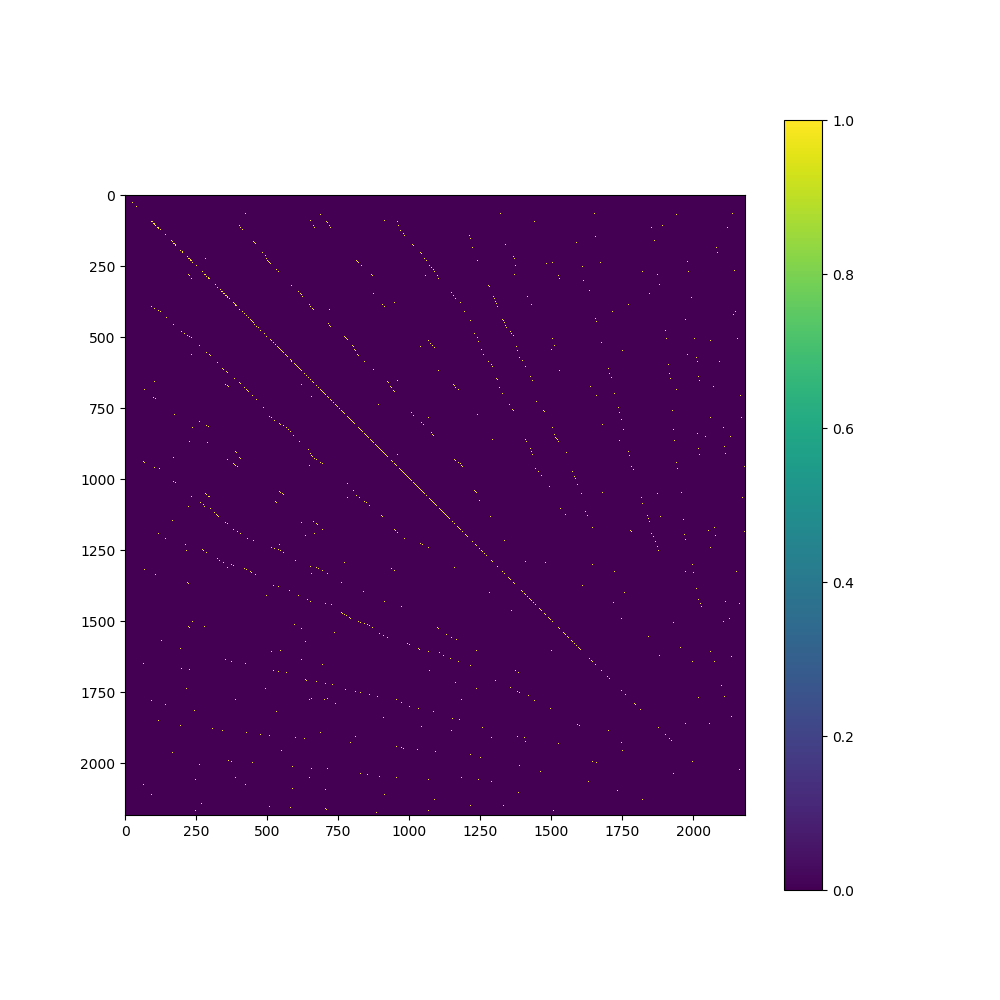

<IPython.core.display.Javascript object>

In [223]:
B = cds.A.toarray()/1.
fig = plt.figure(figsize=(10,10))
plt.imshow(np.where(np.linalg.matrix_power(B,2)>=1,1,0))
plt.colorbar()
fig = plt.figure()
plt.imshow(np.linalg.matrix_power(B,1))
plt.colorbar()

In [228]:
cds.index_cube_dict = {v: k for k, v in cds.cube_ind_dict.items()}

D = np.where(np.linalg.matrix_power(B,3),1,0)
a=np.where(np.diagonal(D)>0)[0]
b = [cds.index_cube_dict[i] for i in a]

In [229]:
ba = np.array(b)

<IPython.core.display.Javascript object>


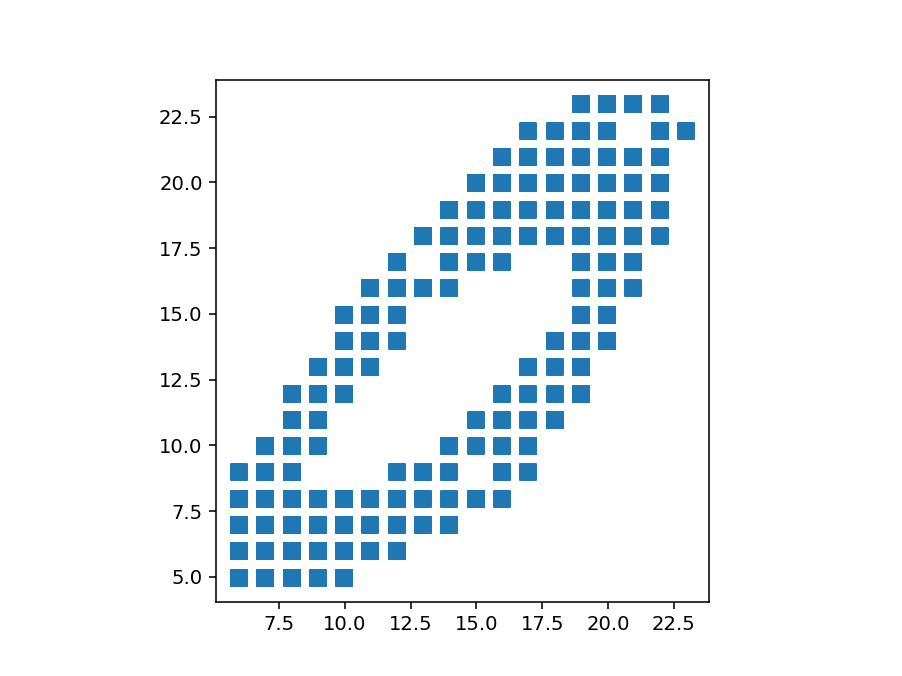

In [230]:
fig, ax = plt.subplots(dpi=141)
ax.set_aspect(1)
fig.canvas.draw()
s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
plt.scatter((ba[:,0]-delta), (ba[:,2]-delta), s=s, marker='s', label=i+1)
# plt.legend()
plt.show()

<IPython.core.display.Javascript object>


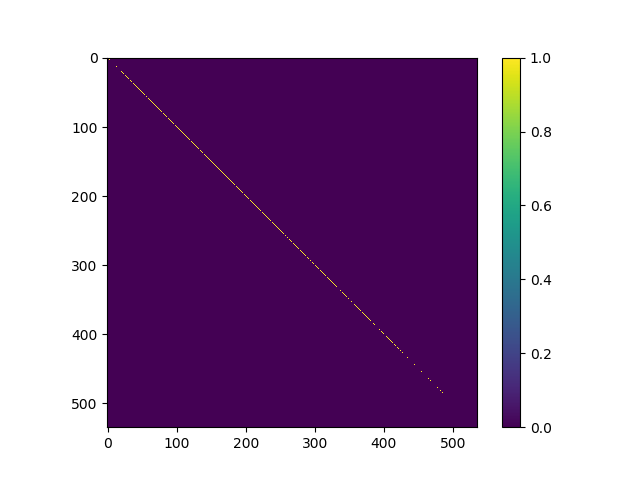

In [192]:
D = np.where(np.linalg.matrix_power(B,5),1,0)
C=np.where(np.triu(D)+np.tril(D).T>1,1,0)
fig = plt.figure()
plt.imshow(C)
plt.colorbar()

In [147]:
np.where(np.linalg.matrix_power(B,2))[0].shape

(12824,)

In [ ]:
cds.index_cube_dict[2181]

In [15]:
#Get the recurrent components (Morse sets)
RCs = cds.get_recurrent_components(includeselfedges=False)
len(RCs)

1

<IPython.core.display.Javascript object>


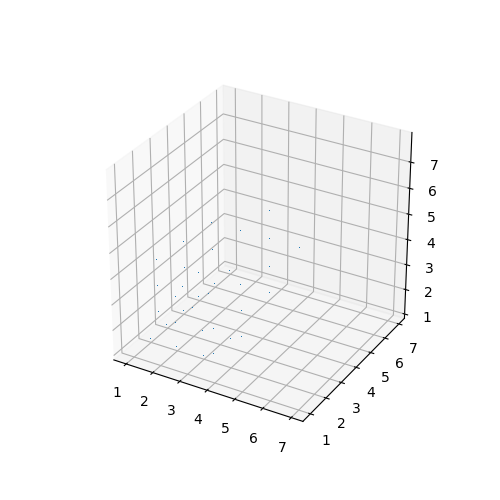

In [67]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(RCs)):
    plt.plot((np.array(RCs[i])[:,0]-delta),(np.array(RCs[i])[:,1]-delta), (np.array(RCs[i])[:,2]-delta), ',', label=i+1)
plt.show()

<IPython.core.display.Javascript object>


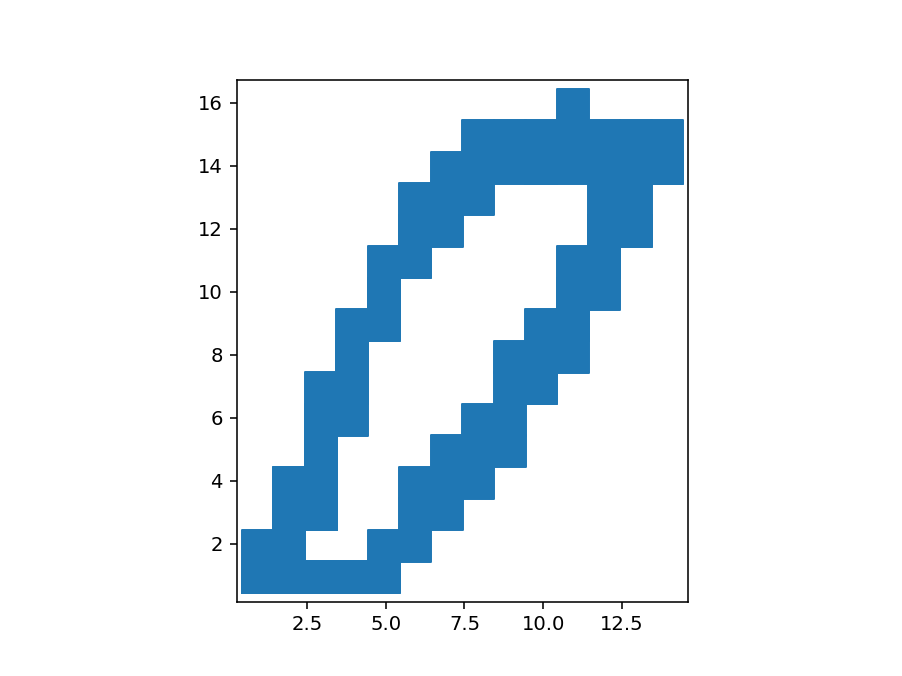

In [17]:
fig, ax = plt.subplots(dpi=141)
for i in range(len(RCs)):
    
    ax.set_aspect(1)
    fig.canvas.draw()
    s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
    plt.scatter((np.array(RCs[i])[:,0]-delta), (np.array(RCs[i])[:,2]-delta), s=s, marker='s', label=i+1)
# plt.legend()
plt.show()

In [68]:
RCs = cds.get_recurrent_components(includeselfedges=False)

RPcubes = {}

for i in range(0,len(RCs)):#range(0,1)
    RPcubes[i] = []
    print("Component", i+1)
    RPcubes[i].append(RCs[i])
    
    #Get (isolated) neighbourhood (candidate) around recurrent set
    Nbhd = RPcubes[i][0]
    print("Finding isolated nbhd")
    S = cds.invariantPart(Nbhd)
    M = cds.cubical_wrap(S).intersection(cds.G.nodes())
#     for mstep in range(1):
#         M = cds.cubical_wrap(M).intersection(cds.G.nodes())
    
    #calculate index pair
    try:
        print("Calculating index pair")
        P1, P0, Pbar1, Pbar0 = cds.index_pair(M)
    
        #write index pairs to file for Conley index calcualtion with CHomP
        
        P1graph = nx.subgraph(cds.G, P1)
        cubefile, mapfile = cf.write_mapandcubes(P1graph, cds.delta, cds)
        with open('rc%s_P1_map.map'%(i+1), 'w') as f:
            f.writelines(mapfile)
        with open('rc%s_P1_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        P0graph = nx.subgraph(cds.G, P0)
        cubefile, mapfile = cf.write_mapandcubes(P0graph, cds.delta, cds)
        with open('rc%s_P0_cubes.cub'%(i+1), 'w') as f:
            f.writelines(cubefile)
            
        print("Calculating homology")
        
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_map.map'%(i+1)],stdout=subprocess.PIPE)
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_cubes.cub'%(i+1), 'rc%s_P0_cubes.cub'%(i+1)],stdout=subprocess.PIPE)
        proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
                                 'rc%s_P1_cubes.cub'%(i+1),
                                 'rc%s_P0_cubes.cub'%(i+1)], stdout=subprocess.PIPE)

        linenum = 0
#         print(proc.stdout.readlines())
        while True:
            line = proc.stdout.readline()
            if not line:
                break
#             print("           "+line.rstrip().decode('UTF-8'))
            if line.rstrip().decode('UTF-8')[0] in ['H', '	', 'D', 'F'] and not line.rstrip().decode('UTF-8')[1] == 'O':
#             if line.rstrip().decode('UTF-8')[0:2] == 'H_' or line.rstrip().decode('UTF-8')[0:2] == '  ' or line.rstrip().decode('UTF-8')[0:2] == 'Di':
                
                print("           "+line.rstrip().decode('UTF-8'))
            linenum+=1
            
    except Exception as e:
        if e=='too many values to unpack (expected 4)':
            print('Faile')
        else:
            print(e)

Component 1
Finding isolated nbhd
Calculating index pair
Calculating homology
           H_0 = Z
           H_1 = Z
           H_0 = Z
           H_1 = Z
           Dim 0:	f (x1) = y1
           Dim 1:	f (x1) = -y1
           Dim 0:	i (x1) = y1
           Dim 1:	i (x1) = -y1
           Dim 0:	I (y1) = x1
           Dim 1:	I (y1) = -x1
           Dim 0:	F (x1) = x1
           Dim 1:	F (x1) = x1


In [69]:
proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
#                                  'rc%s_P1_cubes.cub'%(i+1),
#                                  'rc%s_P0_cubes.cub'%(i+1)
                        ],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Reading the domain of the map from 'rc1_P1_map.map'... 265 cubes read.
           200000 bit fields allocated (2 MB) to speed up 4-dimensional reduction.
           Reducing full-dim cubes from X... .         *         141 removed, 124 left.
           Note: The program assumes that the input map is acyclic.
           Reading the map on X from 'rc1_P1_map.map'... Done.
           Verifying if the image of X is contained in Y... Passed.
           Computing the image of the map... and of the inclusion... 198 cubes.
           Reducing full-dim cubes from Y... .         67 removed, 198 left.
           Transforming X into cells... 124 cells added.
           Transforming Y into cells... 198 cells added.
           Collapsing faces in X... .... 7492 removed, 744 left.
           Note: The dimension of X decrease

In [70]:
i=0
proc = subprocess.Popen(['homcubes', 'rc%s_P1_cubes.cub'%(i+1), 
                                    'rc%s_P0_cubes.cub'%(i+1)],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Note: The empty file 'rc1_P0_cubes.cub' is assumed to contain cubes.
           Reading cubes to X from 'rc1_P1_cubes.cub'... 265 cubes read.
           Reading cubes to A from 'rc1_P0_cubes.cub'... 0 cubes read.
           200000 bit fields allocated (2 MB) to speed up 4-dimensional reduction.
           Reducing full-dim cubes from X... .         0*         0 141 removed, 124 left.
           197 bit fields for dimension 4 were used.
           Transforming X into cells... 124 cells added.
           Collapsing faces in X... 4*.3*.2*.1*. 7504 removed, 732 left.
           Note: The dimension of X decreased from 4 to 1.
           Creating the chain complex of X... . Done.
           Vertices used: 1441 of dim 4.
           Time used so far: 0.09 sec (0.001 min).
           Comp